In [1]:
#First the workbench and other libraries are imported for usage.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ema_workbench import (
    Model,
    Policy,
    SequentialEvaluator,
    ema_logging
)

from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench import Samplers
from ema_workbench.em_framework import get_SALib_problem

from ema_workbench.analysis import prim
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
#Problem formulation 6 was created in the problem_formulation.py file.
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [3]:
# The base case is set so that the policy's are 0
base_case = Policy("base case", **{l.name: 0 for l in dike_model.levers})

In [4]:
#Run the analysis
with SequentialEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=200, policies=base_case, uncertainty_sampling=Samplers.LHS)

[MainProcess/INFO] performing 200 scenarios * 1 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [02:02<00:00,  1.64it/s]
[MainProcess/INFO] experiments finished


[MainProcess/INFO] no time dimension found in results


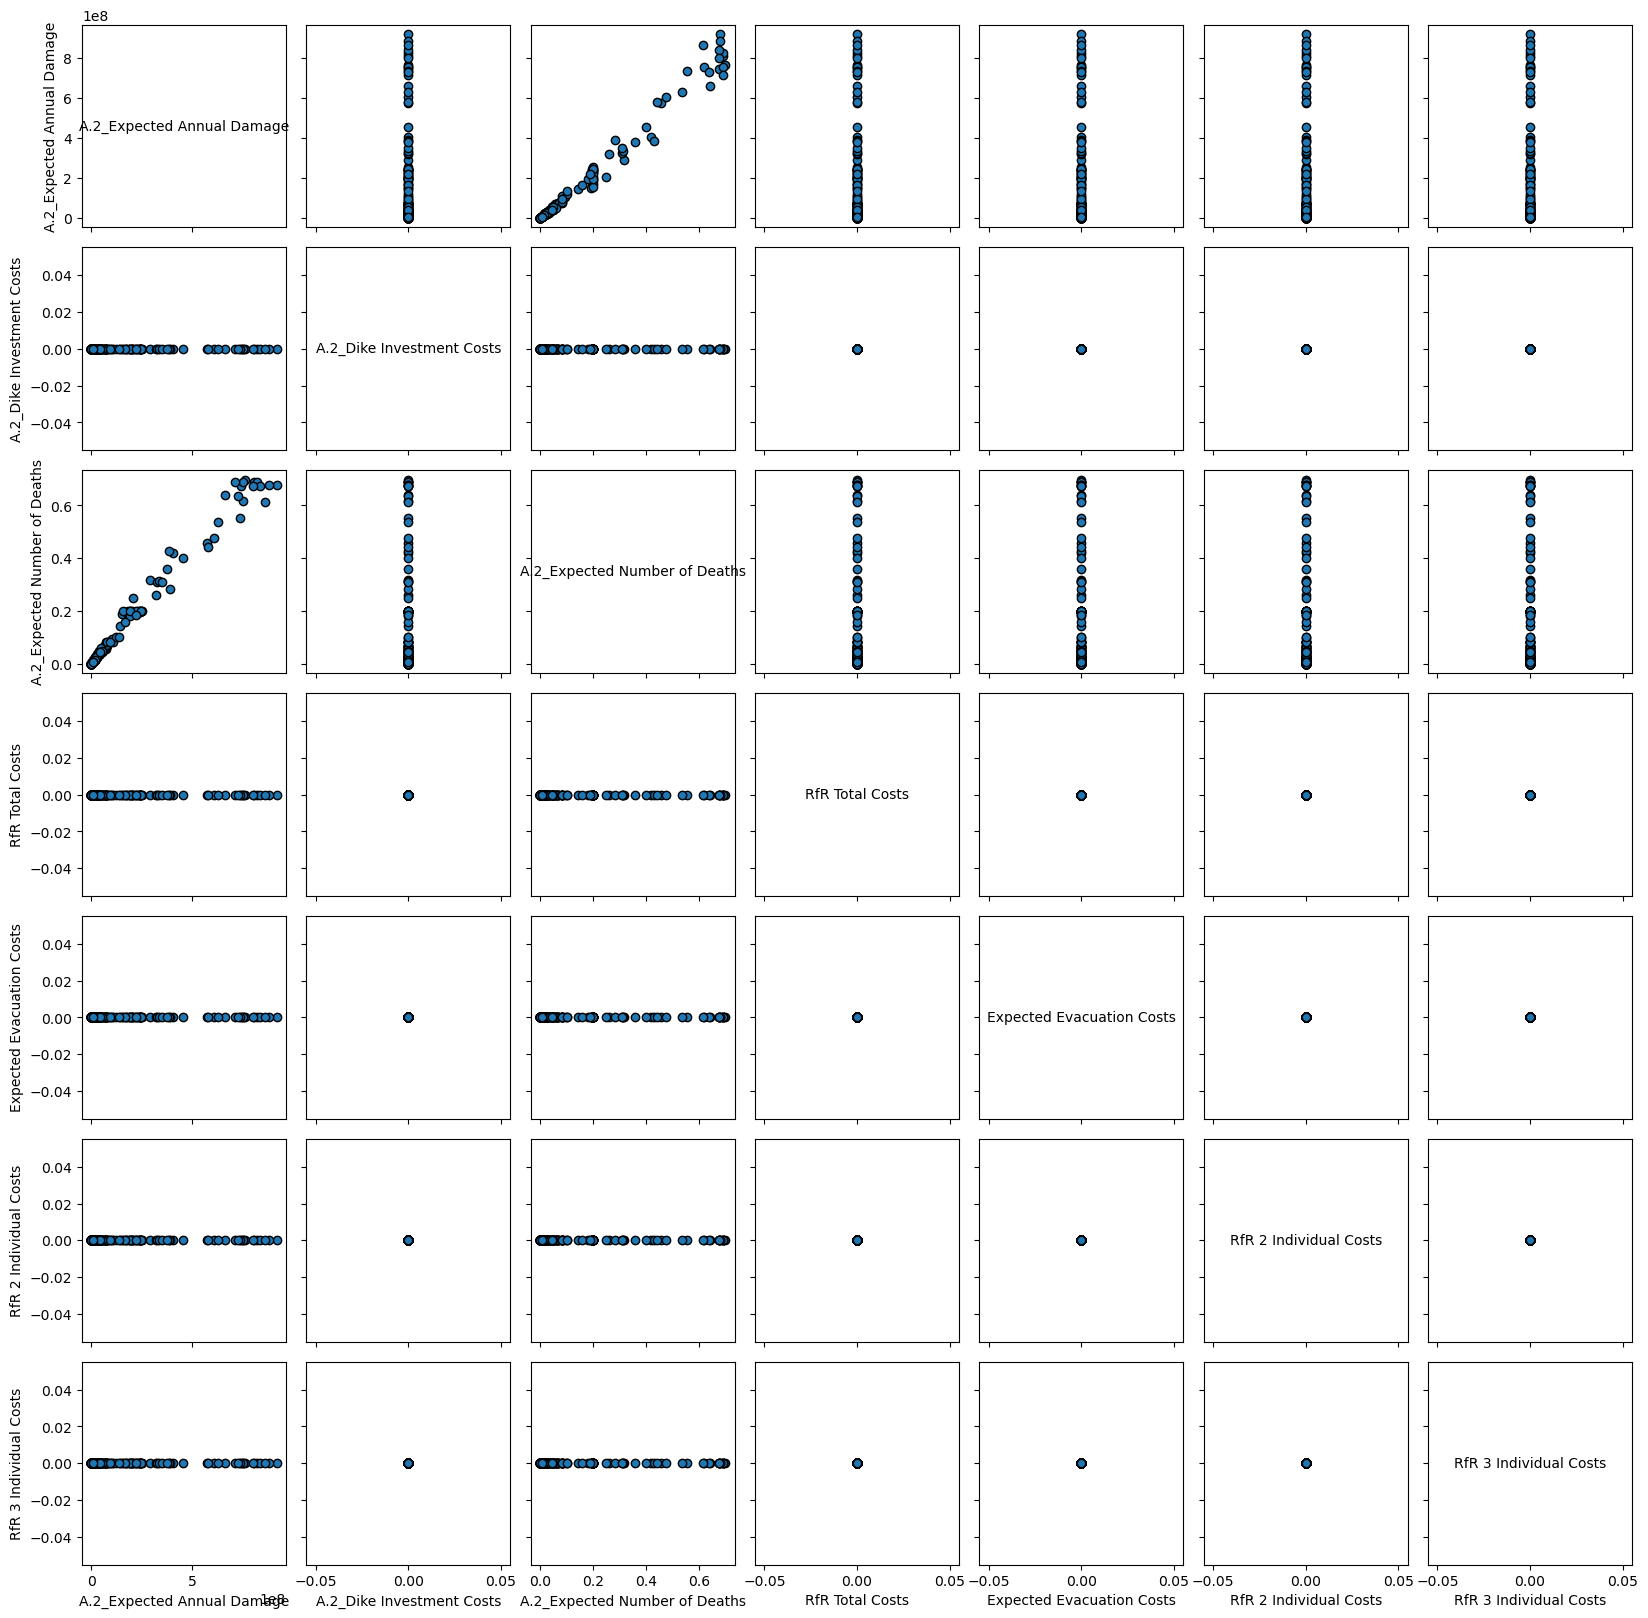

In [5]:
#An initial visualisation to check on interesting starting insights.
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by="policy", legend=False)
fig.set_size_inches(20, 20)
plt.show()

In the following code some parts are copied from other files provided by Jan Kwakkel on GitHub.

# 1. The sensitivity of uncertainty on Expected Annual Damage

First the analysis is done to check the sensitivity of the uncertainties on the expected annual damage.

In [6]:
from ema_workbench.analysis import feature_scoring

In [7]:
#The data has been formatted correctly to be suitable for analysis.
selected_columns = ['A.0_ID flood wave shape', 'A.2_Bmax', 'A.2_pfail', 'A.2_Brate', 'discount rate 0', 'discount rate 1', 'discount rate 2']

cleaned_experiments = experiments[selected_columns]

#cleaned_experiments

In [8]:
#The outcome is set
cleaned_outcomes= outcomes['A.2_Expected Annual Damage']

#cleaned_outcomes

In [9]:
combined_scores = []
for j in range(1, 1500, 1):
    scores = feature_scoring.get_ex_feature_scores(cleaned_experiments.iloc[0:j, :],
                                                   cleaned_outcomes[0:j],
                                                   max_features=0.6,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores.columns = [j]
    combined_scores.append(scores)

C:\Users\31628\miniconda3\envs\gds\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\31628\miniconda3\envs\gds\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [10]:
combined_scores = pd.concat(combined_scores, axis=1, sort=True)

In [11]:
combined_scores

,1,2,3,4,5,6,7,8,9,10,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,,,,,,,,,,,,,,,,,,,,,
A.0_ID flood wave shape,0.0,0.122449,0.086066,0.048309,0.058791,0.091488,0.171412,0.128896,0.157609,0.212557,...,0.061276,0.067276,0.058667,0.066002,0.064202,0.051606,0.063826,0.059502,0.071731,0.067540
A.2_Bmax,0.0,0.204082,0.163934,0.156200,0.106453,0.135808,0.246263,0.216255,0.171656,0.172205,...,0.074552,0.062684,0.070090,0.073570,0.069871,0.067247,0.074246,0.079088,0.067574,0.081114
A.2_Brate,NaN,0.142857,0.163934,0.275362,0.325417,0.193307,0.144605,0.048409,0.076523,0.085026,...,0.053062,0.044322,0.054216,0.048927,0.057824,0.054315,0.052946,0.049817,0.052120,0.048637
A.2_pfail,0.0,0.183673,0.163934,0.130435,0.133808,0.169907,0.125331,0.145361,0.203237,0.269538,...,0.621883,0.622555,0.621926,0.603066,0.607280,0.630086,0.607849,0.607860,0.580513,0.603550
discount rate 0,NaN,0.081633,0.098361,0.115942,0.134764,0.108145,0.194427,0.253747,0.194625,0.153509,...,0.052525,0.060279,0.051135,0.059927,0.050634,0.051158,0.050253,0.057421,0.058687,0.057545
discount rate 1,NaN,0.122449,0.147541,0.130435,0.077137,0.158197,0.080006,0.085901,0.073380,0.061514,...,0.079908,0.085438,0.085611,0.088025,0.087569,0.087700,0.085233,0.087390,0.104197,0.083389
discount rate 2,NaN,0.142857,0.176230,0.143317,0.163630,0.143149,0.037957,0.121429,0.122970,0.045652,...,0.056793,0.057446,0.058354,0.060481,0.062620,0.057889,0.065647,0.058921,0.065179,0.058226


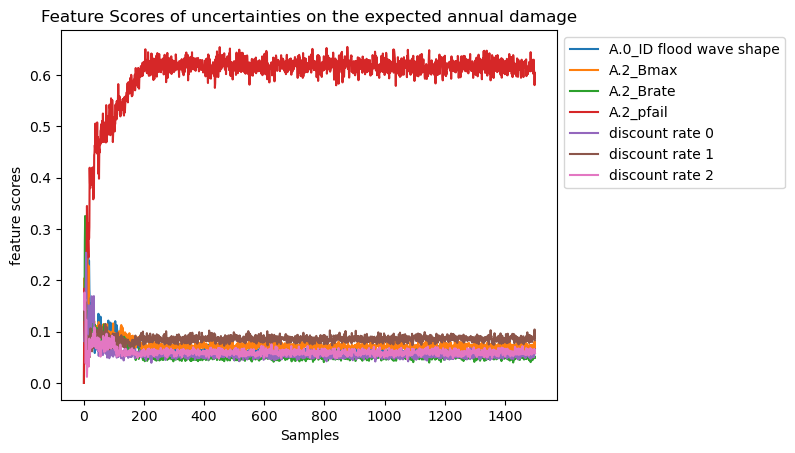

In [12]:
#The results are plotted over 1500 samples.

fig, ax = plt.subplots(1)

ax.set_title('Feature Scores of uncertainties on the expected annual damage')

combined_scores.T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
plt.show()

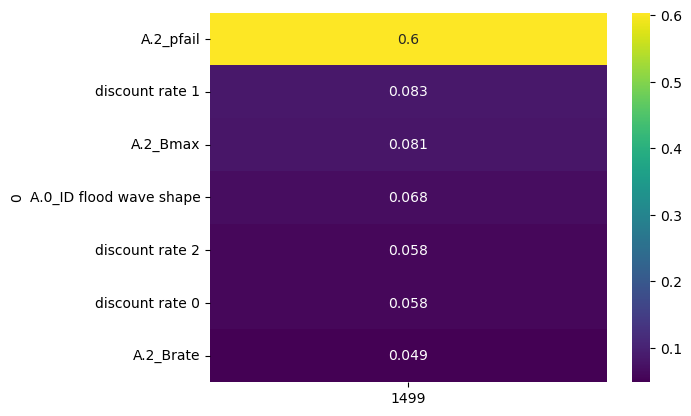

In [13]:
import seaborn as sns
#The results are shown in a heatmap.

sns.heatmap(scores, cmap="viridis", annot=True)
plt.show()

# 2. The sensitivity of uncertainty on Expected Number of Death

Secondly the analysis is done to check the sensitivity of the uncertainties on the expected number of death.

In [14]:
#The data has been formatted correctly to be suitable for analysis.
selected_columns = ['A.0_ID flood wave shape', 'A.2_Bmax', 'A.2_pfail', 'A.2_Brate', 'discount rate 0', 'discount rate 1', 'discount rate 2']

cleaned_experiments = experiments[selected_columns]

#The outcome is set

cleaned_outcomes= outcomes['A.2_Expected Number of Deaths']

In [15]:
combined_scores2 = []
for j in range(1, 1500, 1):
    scores2 = feature_scoring.get_ex_feature_scores(cleaned_experiments.iloc[0:j, :],
                                                   cleaned_outcomes[0:j],
                                                   max_features=0.6,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores2.columns = [j]
    combined_scores2.append(scores2)

C:\Users\31628\miniconda3\envs\gds\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\31628\miniconda3\envs\gds\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [16]:
combined_scores2 = pd.concat(combined_scores2, axis=1, sort=True)

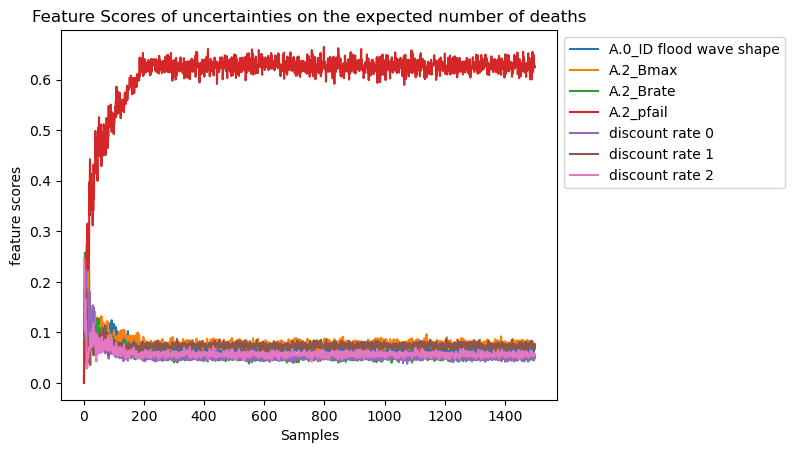

In [17]:
#The results are plotted over 1500 samples.

fig, ax = plt.subplots(1)

ax.set_title('Feature Scores of uncertainties on the expected number of deaths')

combined_scores2.T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
plt.show()

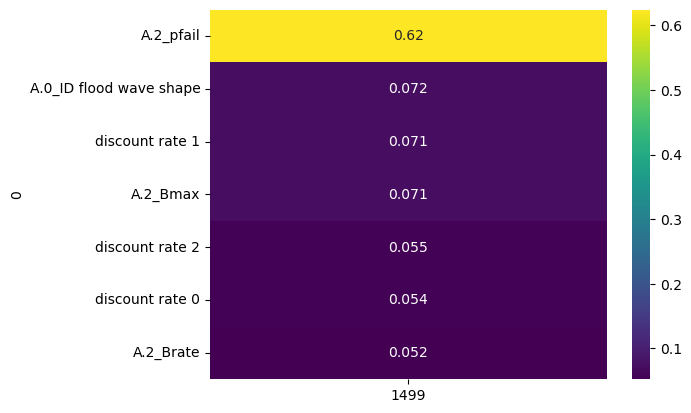

In [18]:
import seaborn as sns
#The results are shown in a heatmap.

sns.heatmap(scores2, cmap="viridis", annot=True)
plt.show()